# Topological Kuramoto model

Here we illustrate the dynamics of the Topological Kuramoto dynamics taking place on the edges of a cell complex. The cell complex is comprised by two octogons, which may be open or closed. This example illustrates how the dynamics of the simplicial Kuramoto model concentrate on the holes of the cell complex.


In [1]:
from functions_kuramoto import *

# Setting parameters
`Number_of_filled_cells`: Number of filled cells of the cell complex hosting the dynamic. The cell complex used is made by 2 octagones joined via one link. Options are 0, 1, 2
`s_c`: This parameter controls the relationship between the internal frequencies of the two octogons. 
        - `s_c = 1`: concordannt, 
        - `s_c = -1`: discordant.

In [2]:
Number_of_filled_cells = 1
s_c = 1 # concordant

## Setting up the cell complex
Contructing the cell complex and the adjacency matrix of the edges. The adjacency matrix is used to define the boundary matrices of the simplicial complex. The if the Number_of_filled_cells=1 the first octagon is filled, the second is empty.

In [3]:
# Create octogons
x,y = octogon_positions()
a, OmegaE = octogon_adjacency(s_c)
I, J = np.where(np.triu(a))
I2, J2 = np.where(np.triu(OmegaE))
L = len(I) #number of edges
# Define internal frequencies:
Omega = (5*OmegaE[I2, J2] + 3*np.random.randn(L)).T

# Boundary matrices:
B1 = create_B1(L,I,J)
B2, B2b = create_B2(L,I,J, Number_of_filled_cells)


## Plot the network skeleton of the cell complex

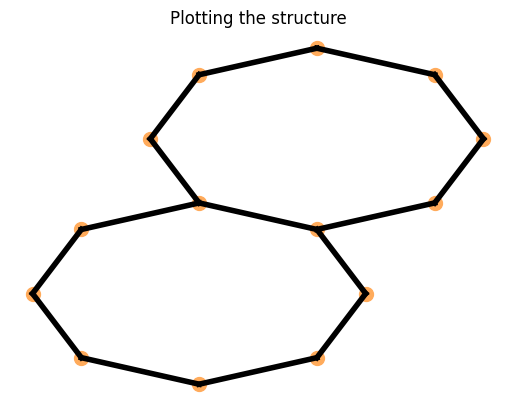

In [4]:
plot_octogons(x, y, I, J)

## Temporal evolution

In [5]:
config = LoadConfig("kuramoto_config.yml")
config['Number_of_filled_cells'] = Number_of_filled_cells
config['s_c'] = s_c

In [6]:
initial_conditions = np.random.rand(B1.shape[1]) * 2 * np.pi
X1a, X2a = kuramoto_integrate_and_plot(initial_conditions, config, B1, B2, B2b, Omega, create_animation=True)

100%|██████████| 10000/10000 [00:30<00:00, 332.44it/s]


Creating GIF...


100%|██████████| 500/500 [00:01<00:00, 310.94it/s]


GIF saved as C:\Users\loren\Progetti\NatPhysPersp\Kuramoto\animations\..\kuramoto_octagons.gif
PNG files removed


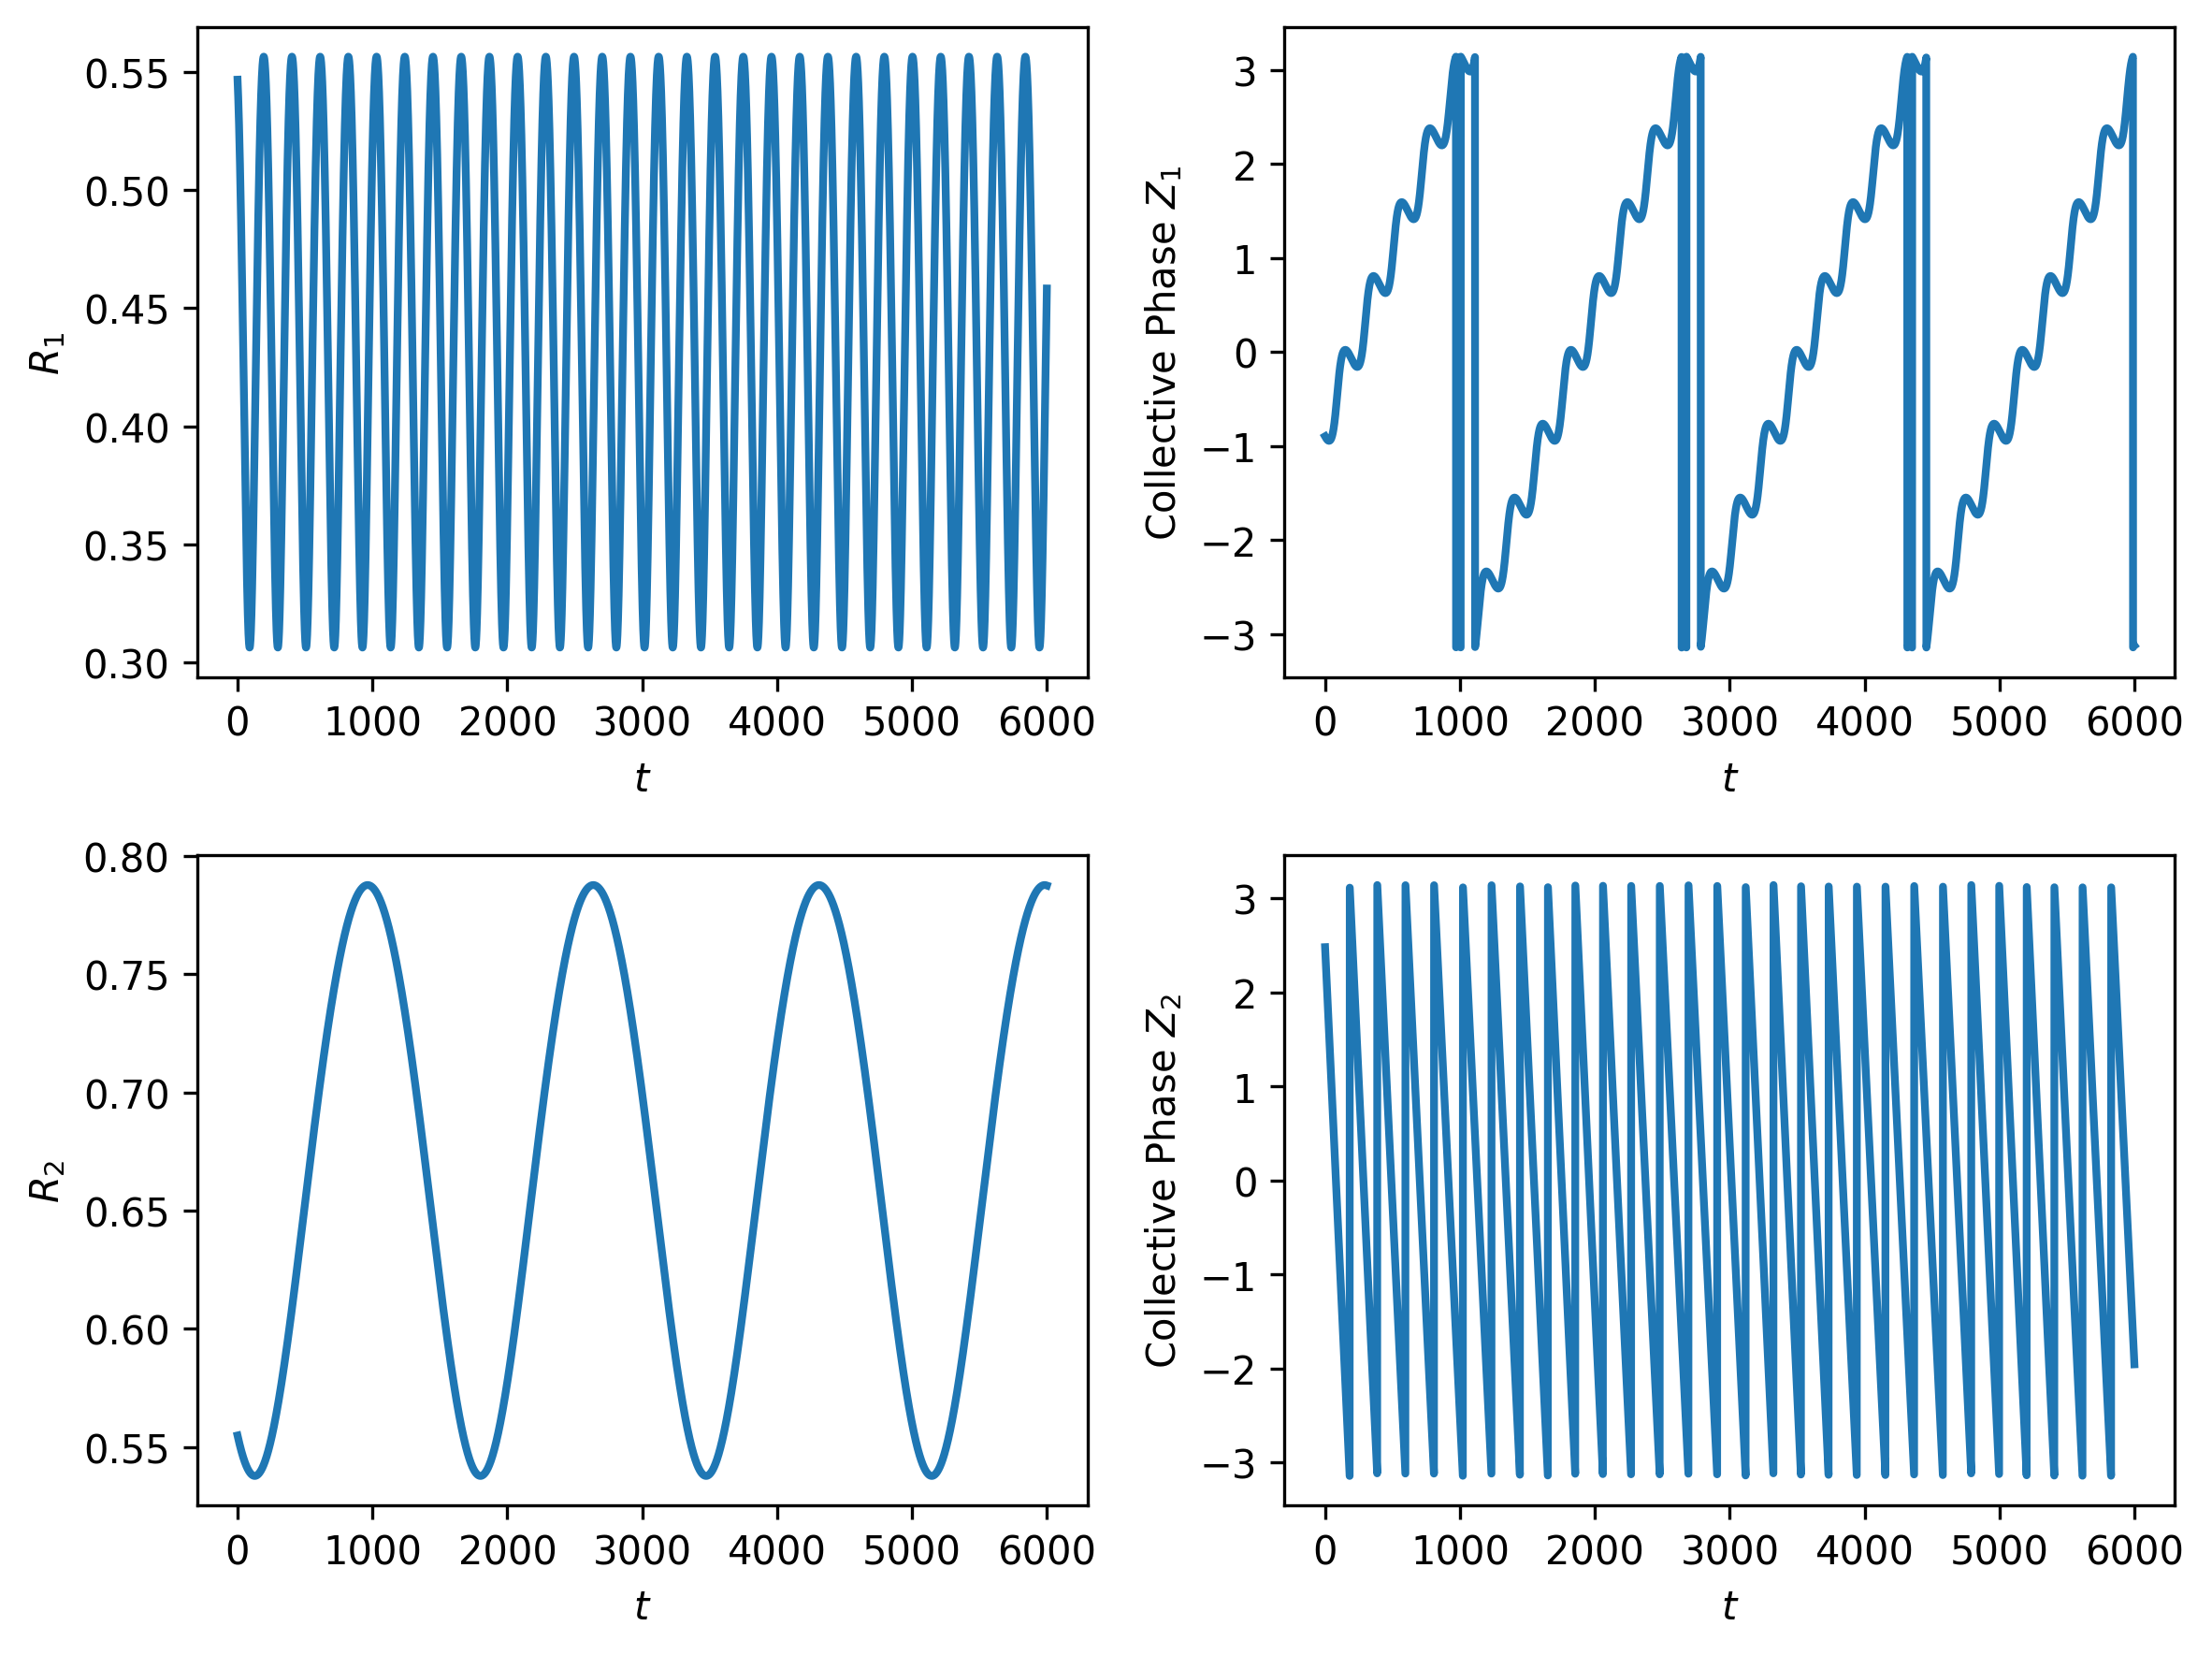

In [7]:
plot_order_parameters(X1a, X2a)